In [1]:
!cat agaricus-lepiota.names

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [2]:
import pandas as pd
df = pd.read_csv("./agaricus-lepiota.data", header=None)
df.columns = ['classes',
              'cap-shape', 'cap-surface', 'cap-color',
              'bruises?', 'odor',
              'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
              'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
              'veil-type', 'veil-color',
              'ring-number', 'ring-type',
              'spore-print-color', 'population', 'habitat']
df = df.astype('category')
df

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# entropy
from scipy.stats import entropy
ent = entropy(df['classes'].value_counts(), base=2)
f'Entropy of the mushroom data: {ent}'

'Entropy of the mushroom data: 0.9990678968724604'

In [19]:
column_name = 'odor'
def entropy_base2(n): return entropy(n, base=2)
series = (df.groupby(column_name)
              ['classes'].value_counts()
              .unstack()
              .apply(entropy_base2, axis=1)
              .sort_values())
width = df[column_name].value_counts(1)

In [21]:
series * width

a    0.000000
c    0.000000
f    0.000000
l    0.000000
m    0.000000
n    0.092993
p    0.000000
s    0.000000
y    0.000000
dtype: float64

In [18]:
df.groupby(column_name)['classes'].value_counts()

odor   
a     e     400
      p       0
c     p     192
      e       0
f     p    2160
      e       0
l     e     400
      p       0
m     p      36
      e       0
n     e    3408
      p     120
p     p     256
      e       0
s     p     576
      e       0
y     p     576
      e       0
Name: classes, dtype: int64

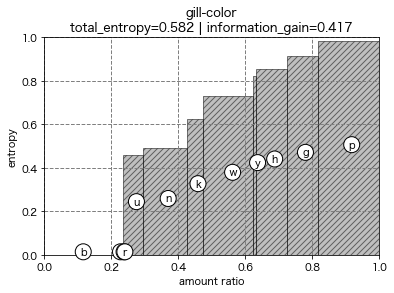

In [27]:
from scipy.stats import entropy
import matplotlib.pyplot as plt
%matplotlib inline

def show_entropy_gain(column_name: str, df: pd.DataFrame = df, orig_entropy: float = ent) -> None:
    # Data prep
    def entropy_base2(n): return entropy(n, base=2)

    series = (df.groupby(column_name)
              ['classes'].value_counts()
              .unstack()
              .apply(entropy_base2, axis=1)
              .sort_values())
    widths = df[column_name].value_counts(1)

    # Calculate Entropy & Information Gain
    total_entropy = (series*widths).sum()
    information_gain = orig_entropy-total_entropy

    # Create figure
    fig, ax = plt.subplots()
    nl='\n'
    ax.set_title(f'{column_name}{nl}{total_entropy=:.3f} | {information_gain=:.3f}')
    ax.set_xlabel('amount ratio')
    ax.set_ylabel('entropy')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.grid(color='gray', linestyle='--', linewidth=1)

    # Visualize
    prev_w = 0
    for ix in series.index:
        g = series[ix]
        w = widths[ix]
        ax.bar(prev_w, g, w, align='edge', color='gray', hatch='////', edgecolor='k', alpha=0.5)
        ax.text(prev_w+(w/2.), g/2., ix, bbox=dict(facecolor='w', edgecolor='k', boxstyle='circle'))
        prev_w += w

show_entropy_gain('gill-color')

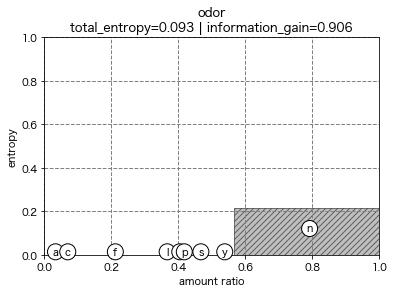

In [28]:
show_entropy_gain('odor')

/var/folders/c0/lp900mk13gs36yqkc86y9pl40000gp/T/ipykernel_16049/3408079465.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


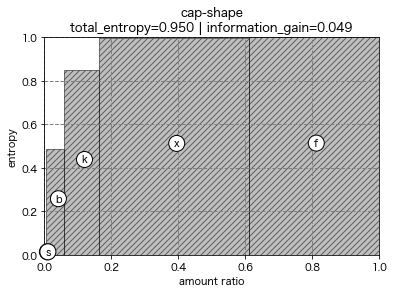

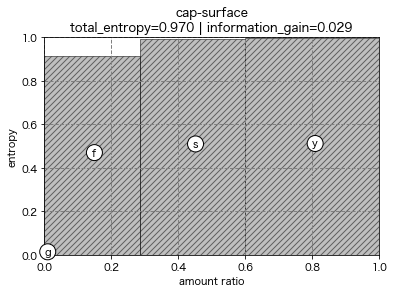

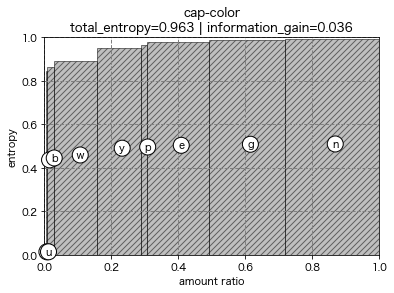

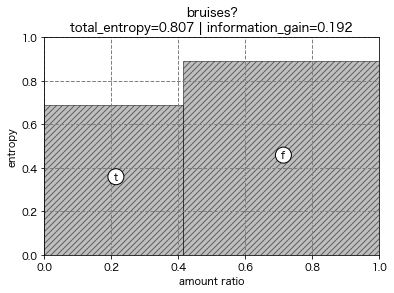

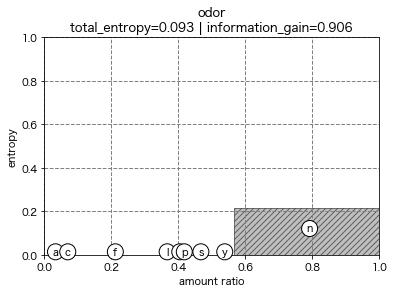

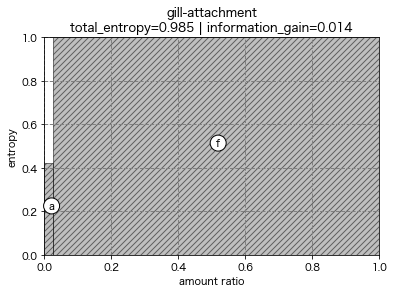

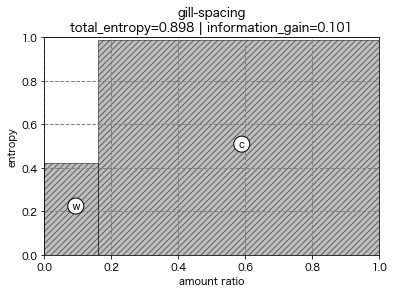

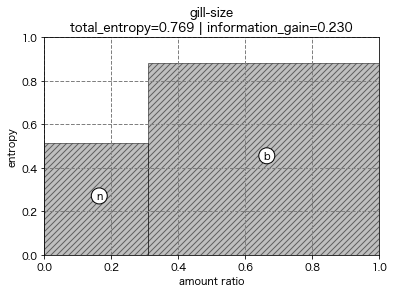

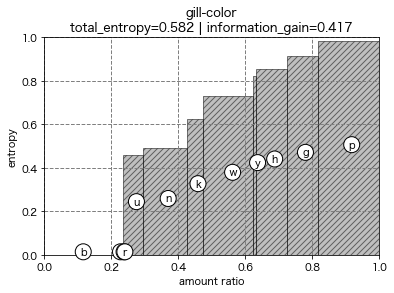

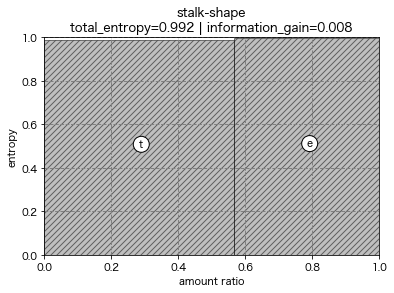

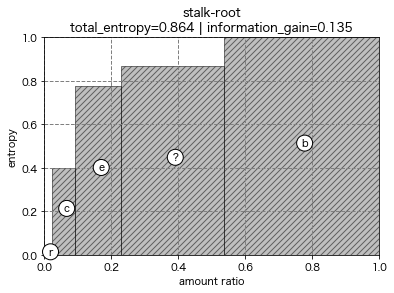

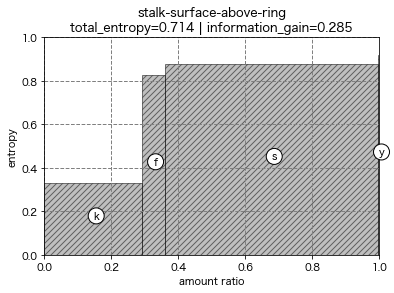

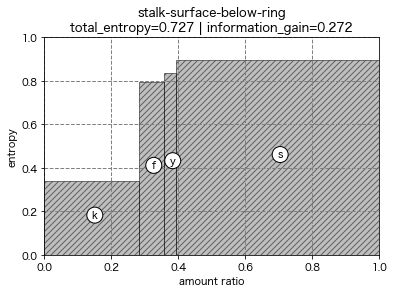

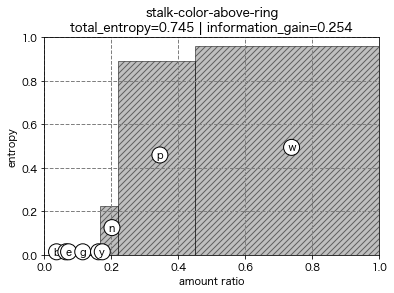

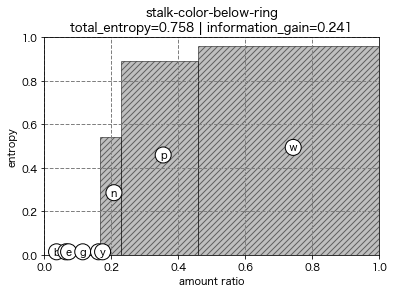

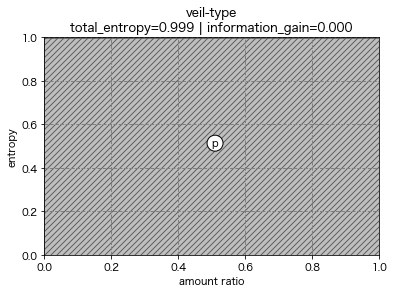

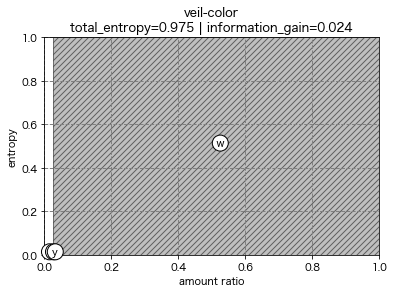

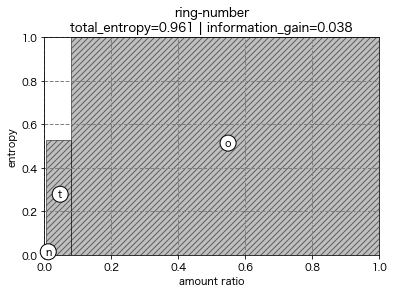

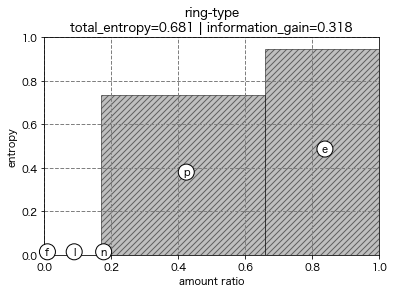

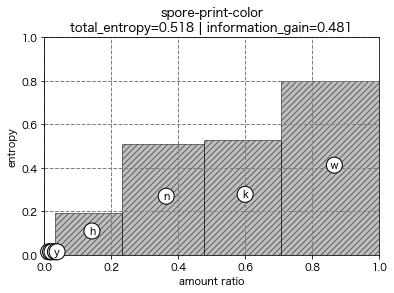

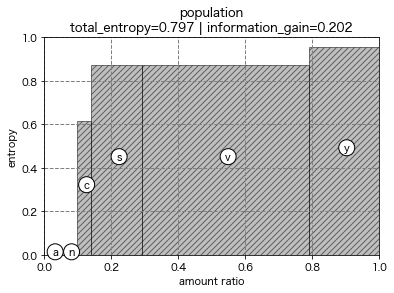

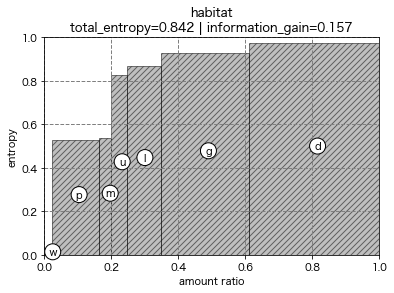

In [ ]:
for col in df.drop(columns="classes"):
    show_entropy_gain(col)